<a href="https://colab.research.google.com/github/katkat13/AI/blob/main/BreastMamaDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, LabelEncoder, RobustScaler

## Breast Mama DataSet
Este es uno de los tres dominios proporcionados por el Instituto de Oncología que ha aparecido repetidamente en la literatura sobre aprendizaje automático.

* Contiene información:
    * `Class`: Estas variables representan si luego del tratamiento tuvo recurrencia la enfermedad o no.
    * `Age`: La edad del paciente en el momento del diagnóstico del cáncer de mama.
    * `Menopause`: Indica el estado de la menopausia del paciente en el momento del diagnóstico. Puede ser premenopáusica, perimenopáusica o postmenopáusica.
    * `Tumor-size`: Tamaño del tumor mamario en milímetros.
    * `Inv-nodes`: Número de ganglios linfáticos invadidos por el tumor.
    * `Node-caps`: Indica si la cápsula del ganglio linfático está comprometida o no.
    * `Deg-malig`: Grado de malignidad del tumor. Podría ser una puntuación que indique la agresividad del cáncer.
    * `Breast`: Indica el lado afectado por el cáncer de mama, puede ser 'left' (izquierda) o 'right' (derecha).
    * `Breast-quad`: Cuadrante de la mama donde se encuentra el tumor. Por ejemplo, superior externo, superior interno, inferior externo, inferior interno, etc.
    * `Irradiat`:  Indica si el paciente recibió radioterapia como parte del tratamiento.
    



In [ ]:
#URL con dataset de datos abiertos de cifras de turismo de la ciudad de Bogotá

url= 'https://docs.google.com/spreadsheets/d/1DY5Y0PuxAdqdSVOUYN7CVUJkPOwl6Ln3w02y1yjIVdQ/export?format=csv'

df = pd.read_csv(url, header=None)
df.columns=['Class', 'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df.head()
# df.tail(30)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
df.columns.values

array(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
       'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

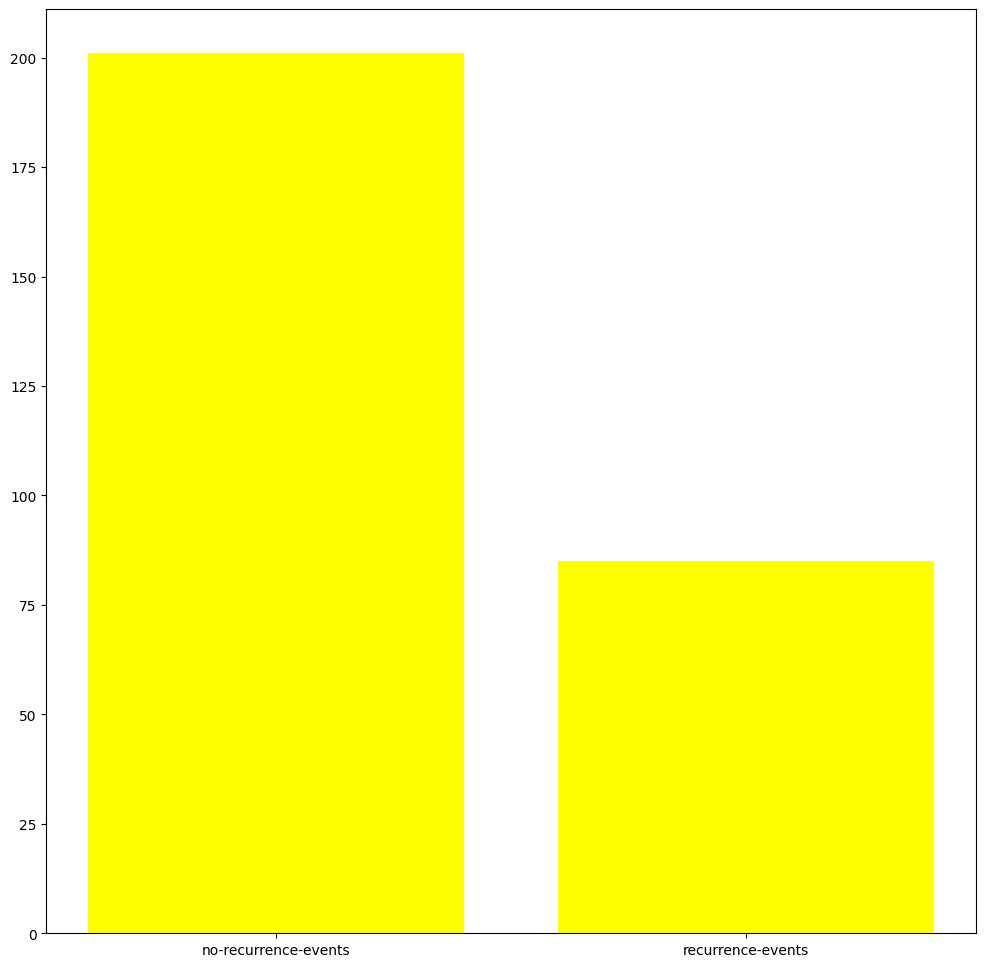

In [ ]:
categoria= df['Class'].unique()
valor= df['Class'].value_counts().tolist()
plt.bar(categoria, valor, color= 'yellow', width= 0.8)
plt.show()

In [ ]:
df["Class"].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [ ]:
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


**Analisis del comportamiento**:
    A mayor Grado de malignidad del tumor (deg-malig) mayor probabilidar de que esl paciente tenga recurrence-events


In [ ]:
df_desc=df.groupby('Class').describe().transpose()
df_desc

Class            no-recurrence-events  recurrence-events
deg-malig count            201.000000          85.000000
          mean               1.905473           2.388235
          std                0.697151           0.725293
          min                1.000000           1.000000
          25%                1.000000           2.000000
          50%                2.000000           3.000000
          75%                2.000000           3.000000
          max                3.000000           3.000000

In [ ]:
df_busqueda= df[(df['deg-malig']==3)& (df['Class']=="recurrence-events")]
df_busqueda

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,NaN,no
208,recurrence-events,50-59,premeno,30-34,0-2,no,3,left,right_up,no
212,recurrence-events,40-49,premeno,30-34,0-2,no,3,right,right_up,no
218,recurrence-events,60-69,ge40,30-34,0-2,no,3,right,central,no
220,recurrence-events,40-49,premeno,25-29,0-2,no,3,left,right_up,no
222,recurrence-events,60-69,ge40,25-29,0-2,no,3,left,right_low,yes
223,recurrence-events,60-69,ge40,20-24,0-2,no,3,right,left_low,no
224,recurrence-events,30-39,premeno,25-29,3-5,yes,3,left,left_low,yes
225,recurrence-events,40-49,ge40,20-24,3-5,no,3,right,left_low,yes
226,recurrence-events,40-49,premeno,30-34,15-17,yes,3,left,left_low,no


<Axes: >

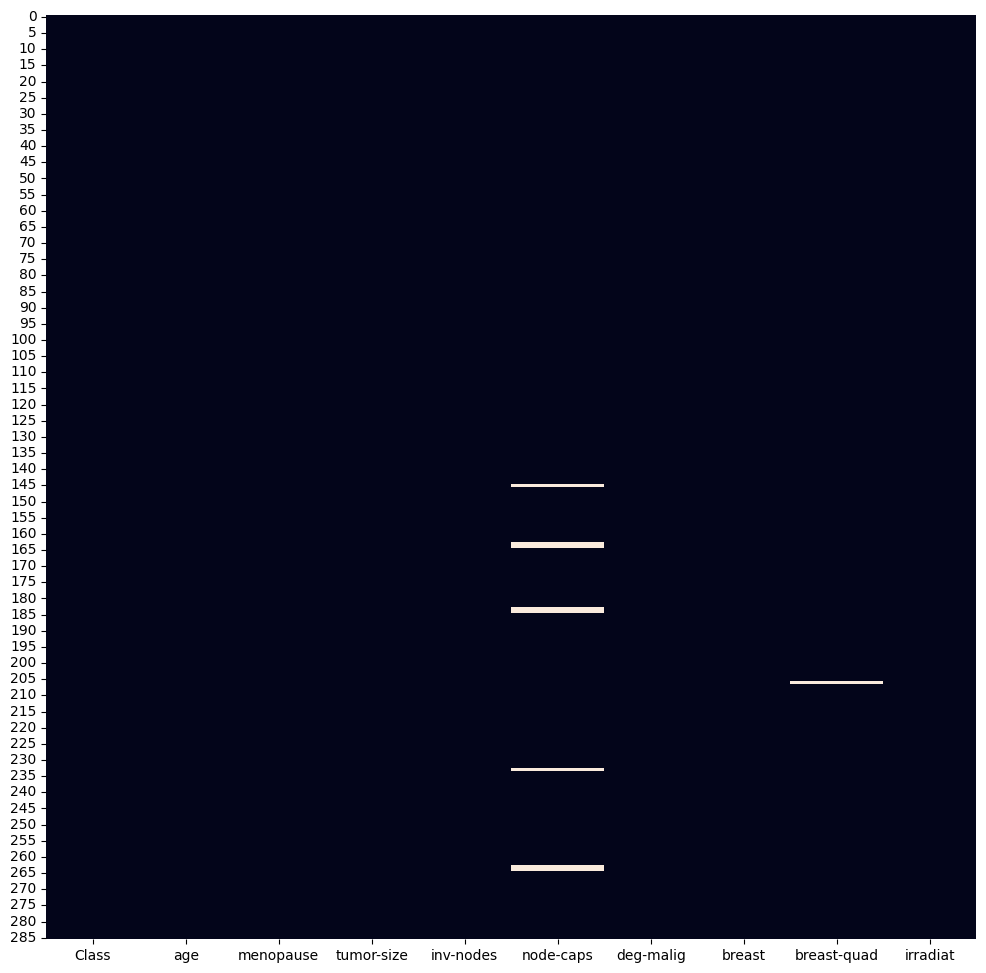

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

#Imputacion de Datos


In [ ]:
df.dropna(subset=['breast-quad'], inplace=True)

In [ ]:
df['node-caps'].fillna('no', inplace=True)

In [ ]:
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

#Codificar

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['tumor-types'] = labelencoder.fit_transform(df['tumor-size'])
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,tumor-types
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,5
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,3
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,3
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,2
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,0
...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no,5
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,3
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no,3
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no,5


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['age-ranges'] = labelencoder.fit_transform(df['age'])
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,tumor-types,age-ranges
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,5,1
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,3,2
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,3,2
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,2,4
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no,5,1
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,3,1
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no,3,4
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no,5,2


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['nodes-types'] = labelencoder.fit_transform(df['inv-nodes'])
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,tumor-types,age-ranges,nodes-types
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,5,1,0
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,3,2,0
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,3,2,0
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,2,4,0
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no,5,1,0
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,3,1,0
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no,3,4,0
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no,5,2,4


In [ ]:
df['tumor-types'].value_counts()

5     59
4     54
3     50
2     30
1     28
7     22
6     19
0      8
10     8
9      4
8      3
Name: tumor-types, dtype: int64

In [ ]:
df.drop(columns=["age","tumor-size", "inv-nodes"], inplace = True)

In [ ]:
clase_cod = df[['tumor-types','age-ranges','nodes-types']]
codificador = OneHotEncoder(sparse_output=False , handle_unknown='ignore' ,dtype=int);
resultados = codificador.fit_transform(clase_cod)
df_codificado = pd.DataFrame(resultados, columns=codificador.get_feature_names_out(['tumor-types','age-ranges','nodes-types']))

df_final = pd.concat([df.drop(['tumor-types','age-ranges','nodes-types'], axis=1), df_codificado], axis=1)
df_final.head()

,Class,menopause,node-caps,deg-malig,breast,breast-quad,irradiat,tumor-types_0,tumor-types_1,tumor-types_2,...,age-ranges_3,age-ranges_4,age-ranges_5,nodes-types_0,nodes-types_1,nodes-types_2,nodes-types_3,nodes-types_4,nodes-types_5,nodes-types_6
0,no-recurrence-events,premeno,no,3.0,left,left_low,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,no-recurrence-events,premeno,no,2.0,right,right_up,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,no-recurrence-events,premeno,no,2.0,left,left_low,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,no-recurrence-events,ge40,no,2.0,right,left_up,no,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,no-recurrence-events,premeno,no,2.0,right,right_low,no,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
clase_cod_2 = df[['Class','menopause','node-caps','breast','breast-quad','irradiat']]
codificador = OneHotEncoder(sparse_output=False , handle_unknown='ignore' ,dtype=int);
resultados = codificador.fit_transform(clase_cod_2)
df_codificado = pd.DataFrame(resultados, columns=codificador.get_feature_names_out(['Class','menopause','node-caps','breast','breast-quad','irradiat']))

df_final = pd.concat([df_final.drop(['Class','menopause','node-caps','breast','breast-quad','irradiat'], axis=1), df_codificado], axis=1)
df_final.head()

,deg-malig,tumor-types_0,tumor-types_1,tumor-types_2,tumor-types_3,tumor-types_4,tumor-types_5,tumor-types_6,tumor-types_7,tumor-types_8,...,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_finall=df_final.dropna()

In [ ]:
# Identificar duplicados
duplicates = df_finall.duplicated()

# Contar el número de duplicados
num_duplicates = duplicates.sum()
print(f"Se encontraron {num_duplicates} filas duplicadas.")

Se encontraron 11 filas duplicadas.


Borrar las tuplas duplicadas

In [ ]:
df_finalll = df_finall.drop_duplicates()

In [ ]:
df_finalll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 284
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   deg-malig                   273 non-null    float64
 1   tumor-types_0               273 non-null    float64
 2   tumor-types_1               273 non-null    float64
 3   tumor-types_2               273 non-null    float64
 4   tumor-types_3               273 non-null    float64
 5   tumor-types_4               273 non-null    float64
 6   tumor-types_5               273 non-null    float64
 7   tumor-types_6               273 non-null    float64
 8   tumor-types_7               273 non-null    float64
 9   tumor-types_8               273 non-null    float64
 10  tumor-types_9               273 non-null    float64
 11  tumor-types_10              273 non-null    float64
 12  age-ranges_0                273 non-null    float64
 13  age-ranges_1                273 non

#Graficas

<Axes: >

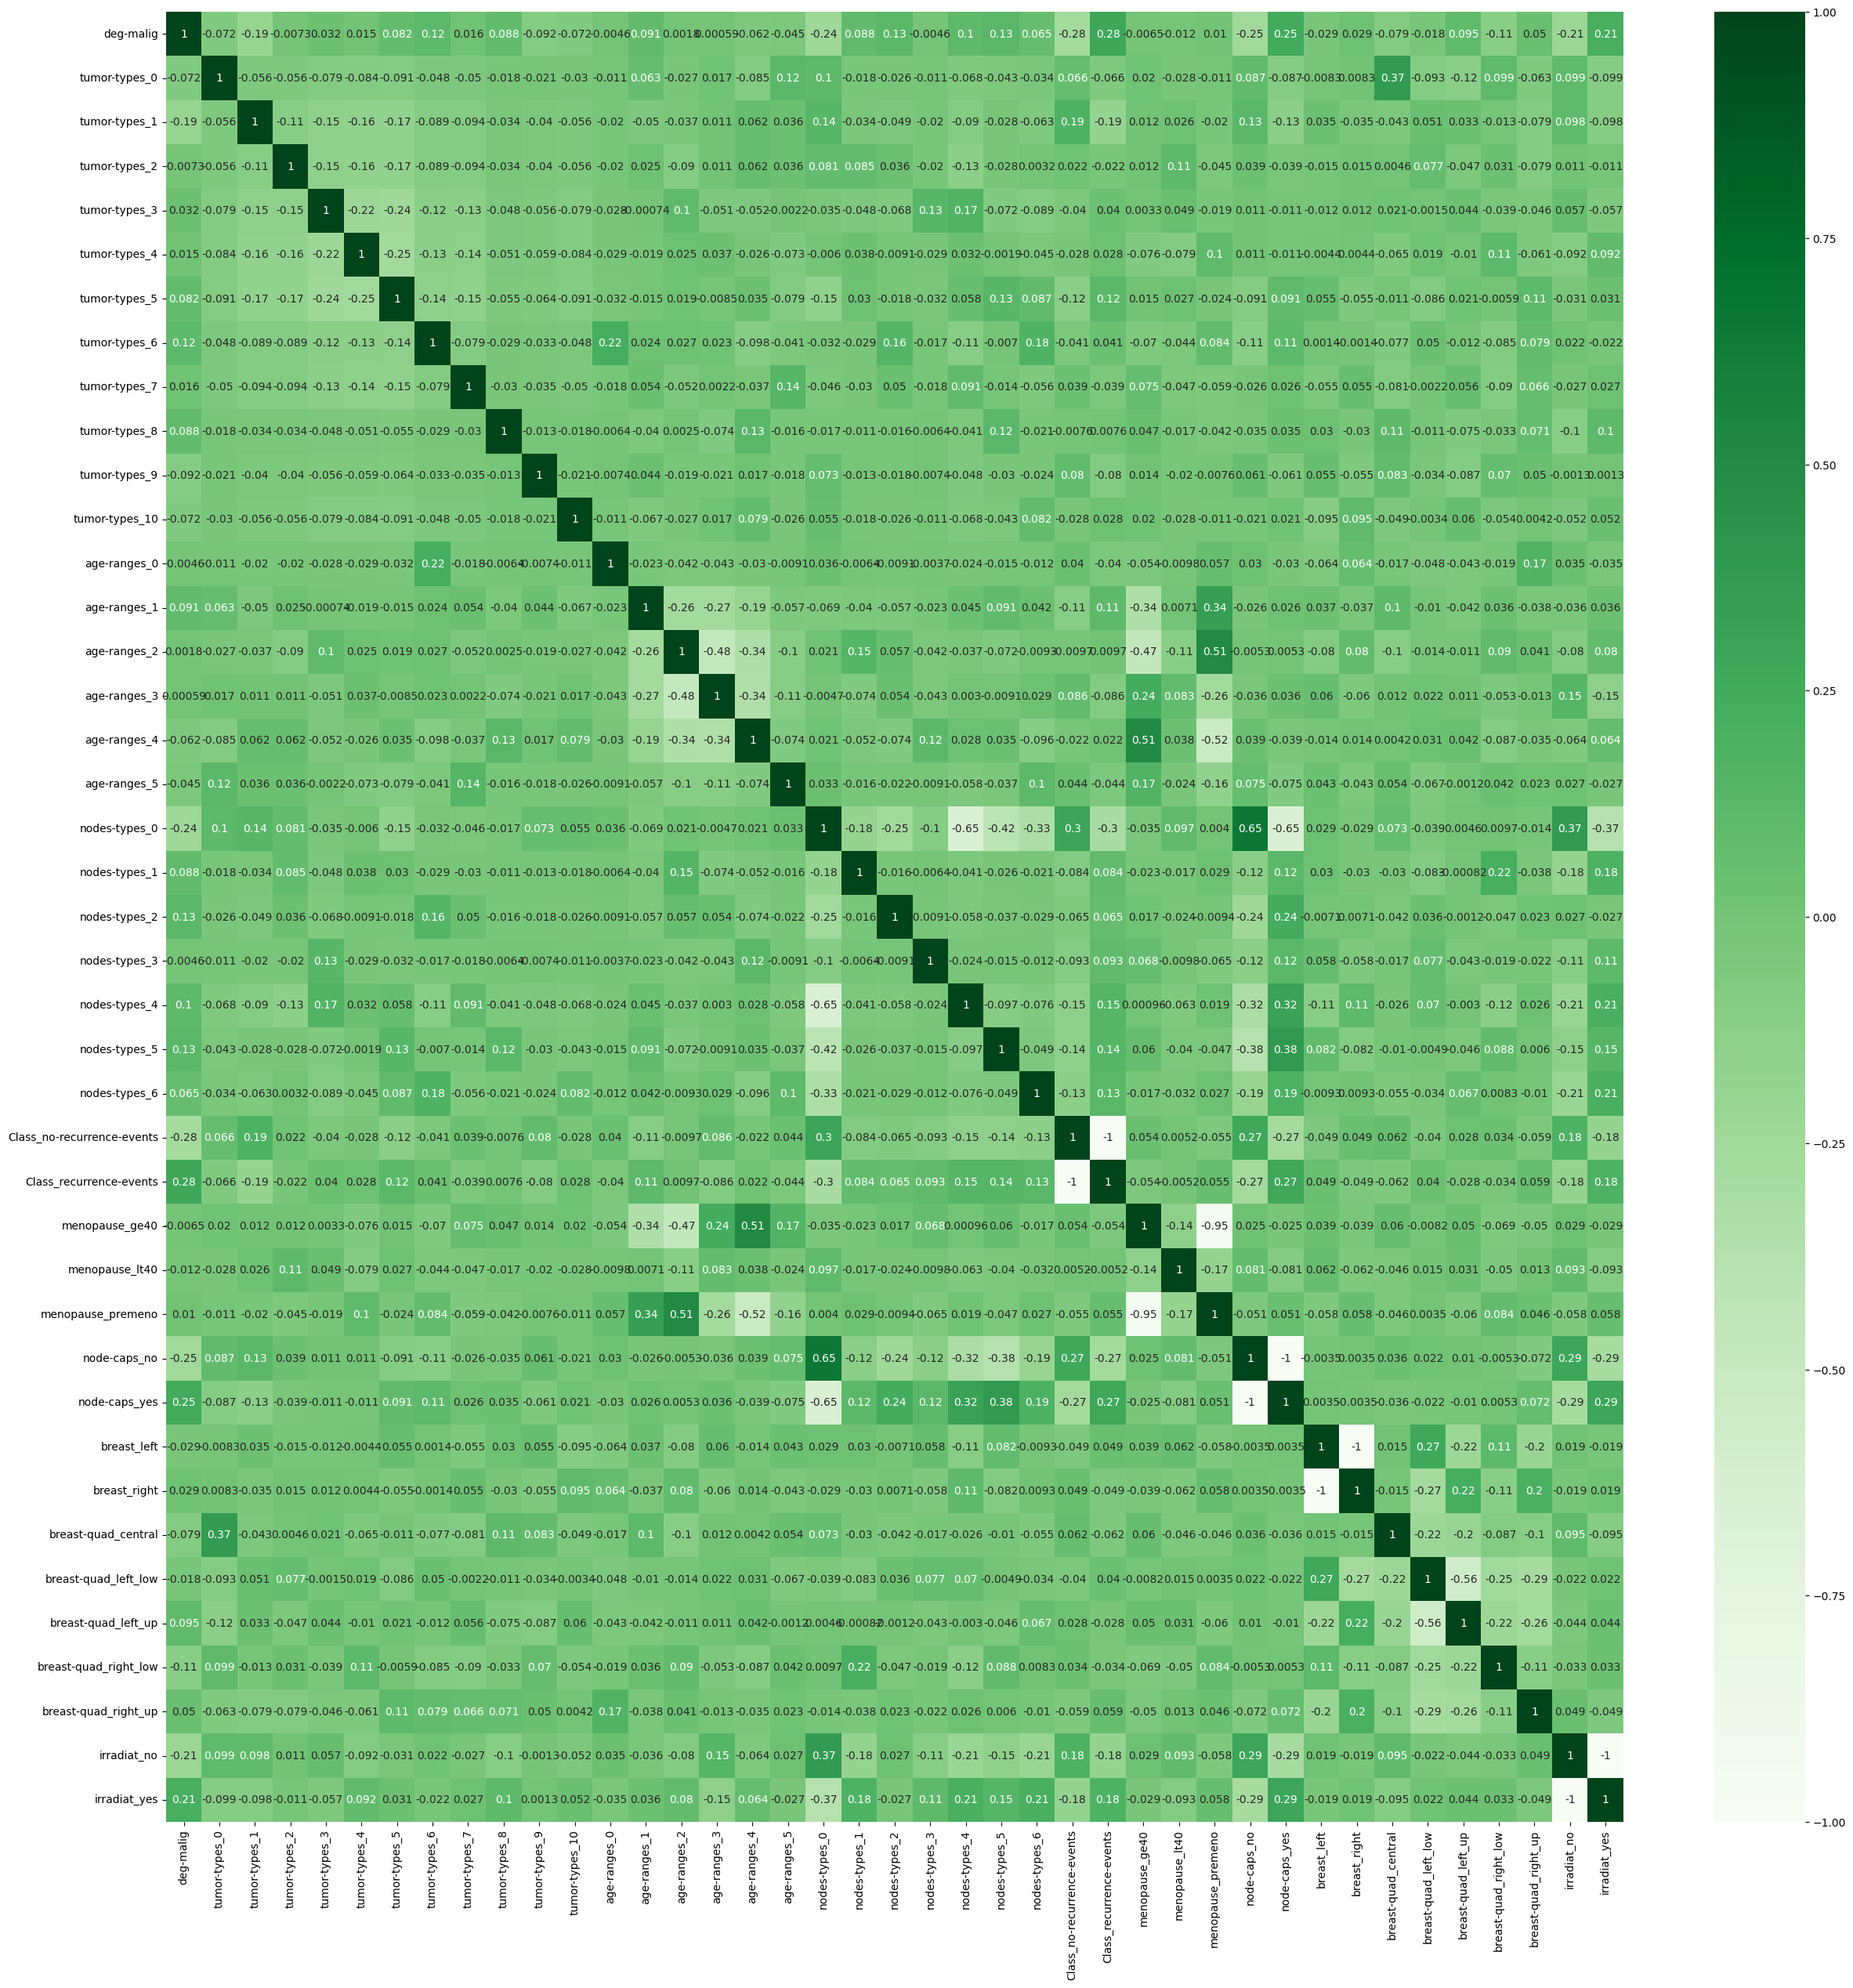

In [ ]:
plt.rcParams["figure.figsize"]=(30,30)
df_corr=df_finalll.corr()
sns.heatmap(df_corr, cmap="Greens", annot = True)

#Entrenamiento

In [ ]:
df_x=df_finalll[['deg-malig',	'tumor-types_0',	'tumor-types_1',	'tumor-types_2',	'tumor-types_3',	'tumor-types_4',	'tumor-types_5',	'tumor-types_6',	'tumor-types_7',	'tumor-types_8',	'tumor-types_9',	'tumor-types_10','age-ranges_0','age-ranges_1','age-ranges_2','age-ranges_3','age-ranges_4','age-ranges_5','nodes-types_0','nodes-types_1','nodes-types_2','nodes-types_3','nodes-types_4','nodes-types_5','nodes-types_6','menopause_ge40','menopause_lt40','menopause_premeno','node-caps_no','node-caps_yes','breast_left','breast_right','breast-quad_central','breast-quad_left_low','breast-quad_left_up','breast-quad_right_low','breast-quad_right_up','irradiat_no','irradiat_yes']]
df_x=df_x.to_numpy()
df_y=df_finalll[['Class_no-recurrence-events',	'Class_recurrence-events']]
df_y=df_y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3)


In [ ]:
#Synthetic Minority Over-sampling Technique- Tecnica de sobremuestreo
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

y_resampled = np.column_stack([(1 - y_resampled), y_resampled])

Iteration 1, loss = 1.58073186
Iteration 2, loss = 1.54251824
Iteration 3, loss = 1.52180320
Iteration 4, loss = 1.51371194
Iteration 5, loss = 1.50989781
Iteration 6, loss = 1.50684419
Iteration 7, loss = 1.50409662
Iteration 8, loss = 1.50108560
Iteration 9, loss = 1.49734832
Iteration 10, loss = 1.49156037
Iteration 11, loss = 1.48494540
Iteration 12, loss = 1.47483024
Iteration 13, loss = 1.46664175
Iteration 14, loss = 1.46139232
Iteration 15, loss = 1.45251219
Iteration 16, loss = 1.44323017
Iteration 17, loss = 1.43556116
Iteration 18, loss = 1.42744886
Iteration 19, loss = 1.41908961
Iteration 20, loss = 1.41058472
Iteration 21, loss = 1.40109932
Iteration 22, loss = 1.39213765
Iteration 23, loss = 1.38459578
Iteration 24, loss = 1.37473320
Iteration 25, loss = 1.36779883
Iteration 26, loss = 1.35960203
Iteration 27, loss = 1.35119401
Iteration 28, loss = 1.34622122
Iteration 29, loss = 1.33841052
Iteration 30, loss = 1.33248776
Iteration 31, loss = 1.33021936
Iteration 32, los

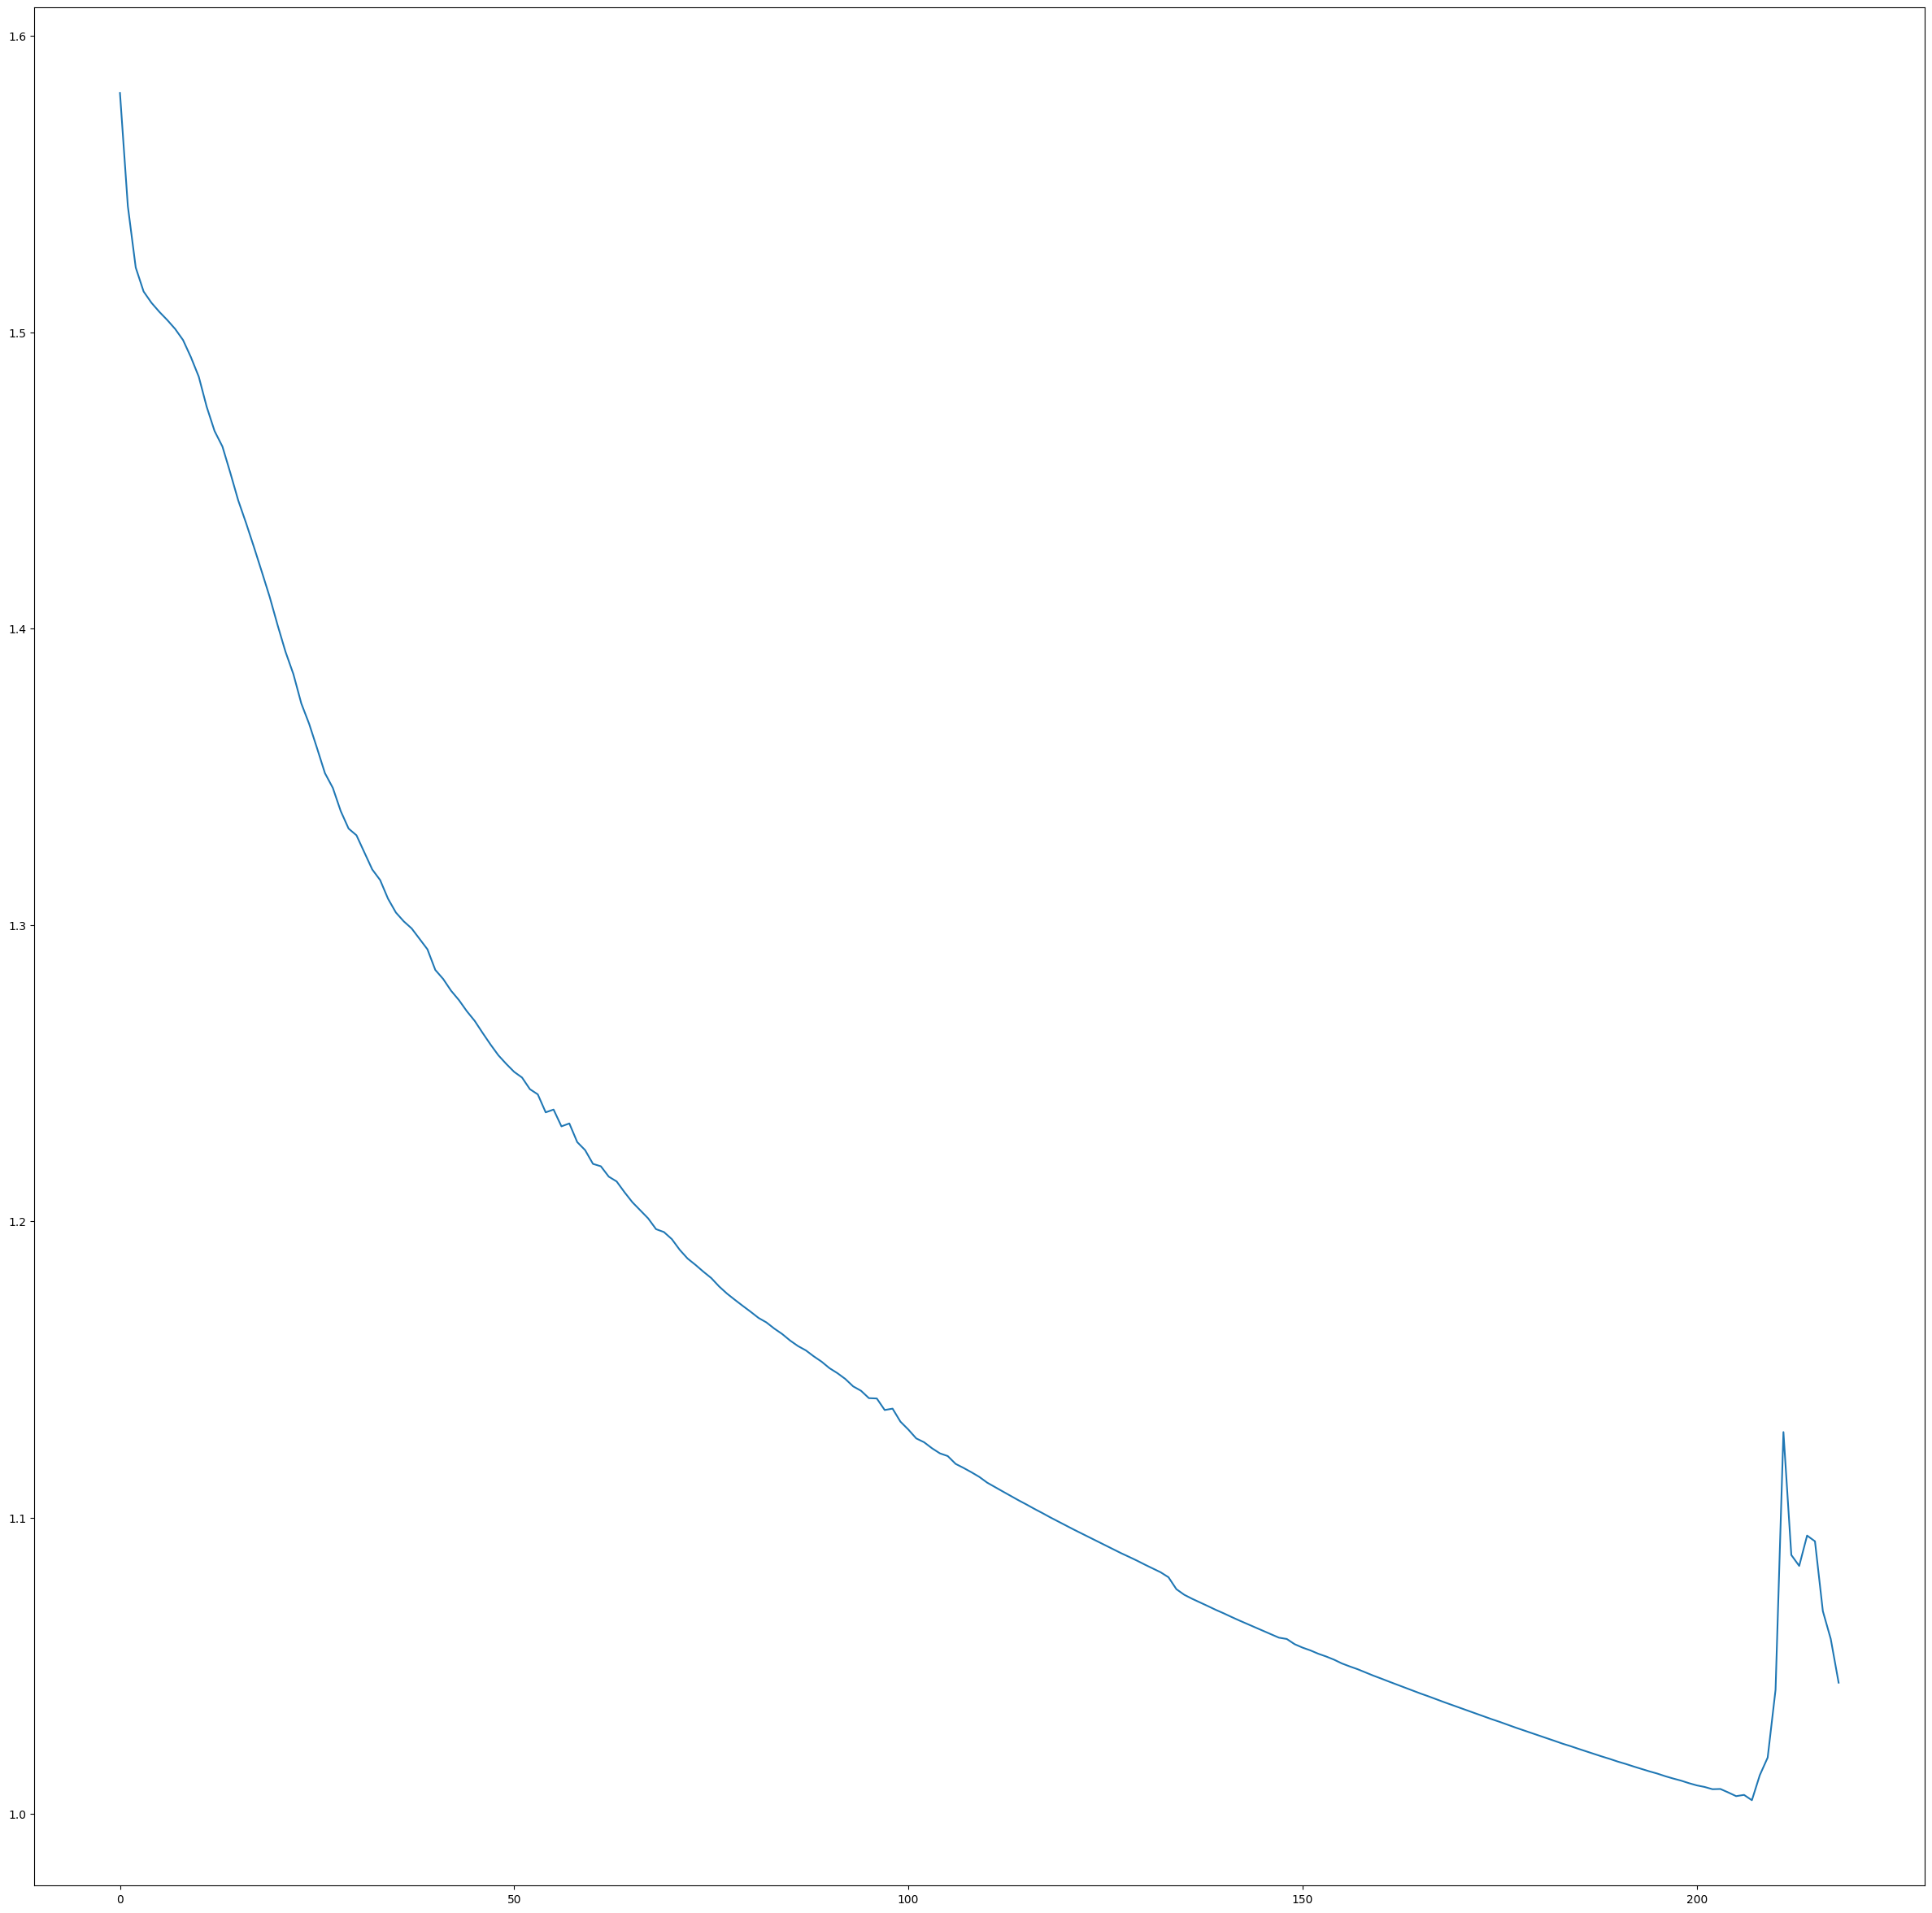

In [ ]:
np.random.seed(0)
clf = MLPClassifier(solver='adam', activation='tanh', tol=1e-20,
                    hidden_layer_sizes=(78, 48, 10, 15 ,10,4,2,1),learning_rate='constant',
                    learning_rate_init=0.001, max_iter=1000, momentum=0.1, verbose=True)
# clf.fit(x_train, y_train)
clf.fit(x_resampled, y_resampled)
plt.plot(clf.loss_curve_)
print(dir(clf))

#Modelo sin Normalizar

In [ ]:
y_pred=clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)
print(classification_report(y_test, y_pred))
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)
print(confusion_matrices)
prec=precision_score(y_test, y_pred, average=None)
print('precision',prec)

Precisión del modelo: 0.5487804878048781
              precision    recall  f1-score   support

           0       0.74      0.47      0.57        53
           1       0.42      0.69      0.52        29

   micro avg       0.55      0.55      0.55        82
   macro avg       0.58      0.58      0.55        82
weighted avg       0.62      0.55      0.56        82
 samples avg       0.55      0.55      0.55        82

[[[20  9]
  [28 25]]

 [[25 28]
  [ 9 20]]]
precision [0.73529412 0.41666667]


In [ ]:
condicion = df_finall['deg-malig']!=0
df_xd=df_finall[condicion]
df_xd

,deg-malig,tumor-types_0,tumor-types_1,tumor-types_2,tumor-types_3,tumor-types_4,tumor-types_5,tumor-types_6,tumor-types_7,tumor-types_8,...,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
281,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
282,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
283,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#Normalización

In [ ]:
normaliza = RobustScaler()
df_normalizado = df_finalll.copy()
df_normalizado[['deg-malig']] = normaliza.fit_transform(df_normalizado[['deg-malig']])
print(df_normalizado)

     deg-malig  tumor-types_0  tumor-types_1  tumor-types_2  tumor-types_3  \
0          1.0            0.0            0.0            0.0            0.0   
1          0.0            0.0            0.0            0.0            1.0   
2          0.0            0.0            0.0            0.0            1.0   
3          0.0            0.0            0.0            1.0            0.0   
4          0.0            1.0            0.0            0.0            0.0   
..         ...            ...            ...            ...            ...   
280        1.0            0.0            0.0            0.0            0.0   
281        0.0            0.0            0.0            0.0            1.0   
282        1.0            0.0            0.0            0.0            1.0   
283       -1.0            0.0            0.0            0.0            0.0   
284        1.0            0.0            0.0            0.0            0.0   

     tumor-types_4  tumor-types_5  tumor-types_6  tumor-types_7

In [ ]:
df_x=df_normalizado[['deg-malig',	'tumor-types_0',	'tumor-types_1',	'tumor-types_2',	'tumor-types_3',	'tumor-types_4',	'tumor-types_5',	'tumor-types_6',	'tumor-types_7',	'tumor-types_8',	'tumor-types_9',	'tumor-types_10','age-ranges_0','age-ranges_1','age-ranges_2','age-ranges_3','age-ranges_4','age-ranges_5','nodes-types_0','nodes-types_1','nodes-types_2','nodes-types_3','nodes-types_4','nodes-types_5','nodes-types_6','menopause_ge40','menopause_lt40','menopause_premeno','node-caps_no','node-caps_yes','breast_left','breast_right','breast-quad_central','breast-quad_left_low','breast-quad_left_up','breast-quad_right_low','breast-quad_right_up','irradiat_no','irradiat_yes']]
df_x=df_x.to_numpy()
df_y=df_normalizado[['Class_no-recurrence-events',	'Class_recurrence-events']]
df_y=df_y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3)

In [ ]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

y_resampled = np.column_stack([(1 - y_resampled), y_resampled])

Iteration 1, loss = 1.56741664
Iteration 2, loss = 1.53744381
Iteration 3, loss = 1.51986472
Iteration 4, loss = 1.51070649
Iteration 5, loss = 1.50494590
Iteration 6, loss = 1.49861562
Iteration 7, loss = 1.49235466
Iteration 8, loss = 1.48340257
Iteration 9, loss = 1.47502268
Iteration 10, loss = 1.46705773
Iteration 11, loss = 1.46101691
Iteration 12, loss = 1.45458826
Iteration 13, loss = 1.44716694
Iteration 14, loss = 1.43929329
Iteration 15, loss = 1.43296240
Iteration 16, loss = 1.42697029
Iteration 17, loss = 1.42045709
Iteration 18, loss = 1.41448635
Iteration 19, loss = 1.40867420
Iteration 20, loss = 1.40363395
Iteration 21, loss = 1.39795648
Iteration 22, loss = 1.39205874
Iteration 23, loss = 1.38827168
Iteration 24, loss = 1.38347045
Iteration 25, loss = 1.37917757
Iteration 26, loss = 1.37390421
Iteration 27, loss = 1.37004421
Iteration 28, loss = 1.36588060
Iteration 29, loss = 1.36148465
Iteration 30, loss = 1.35805146
Iteration 31, loss = 1.35558421
Iteration 32, los

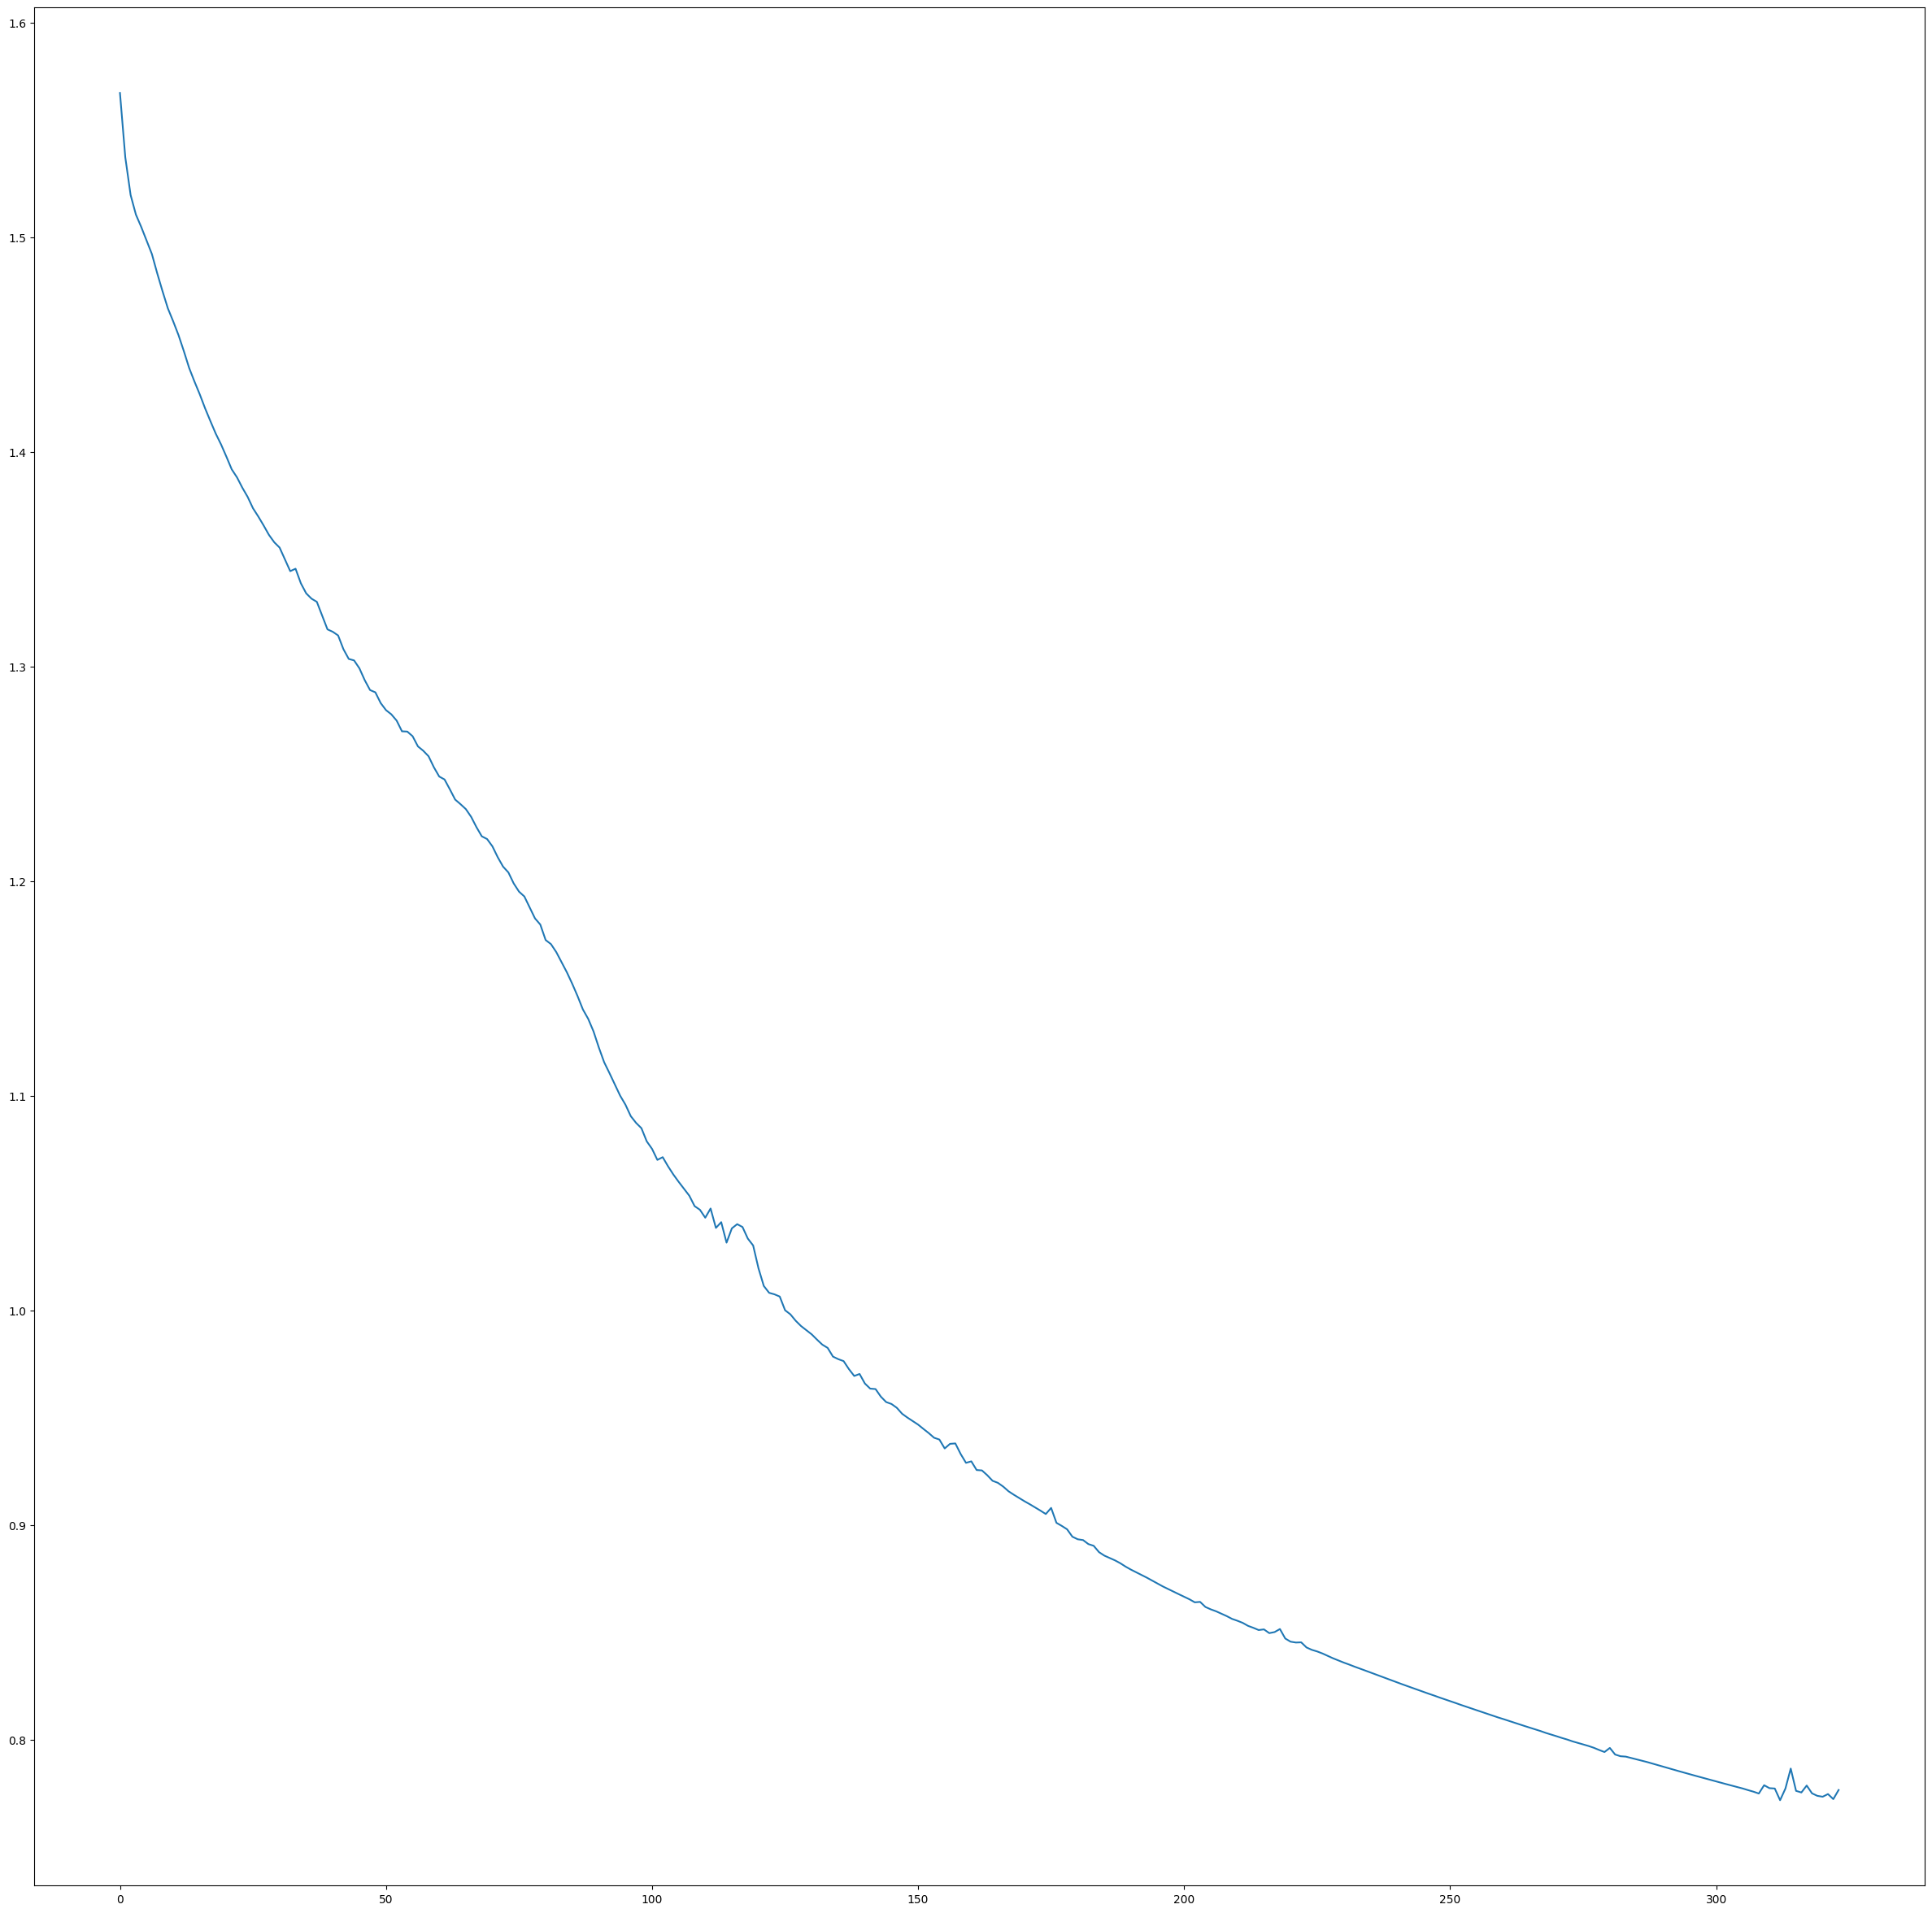

In [ ]:
np.random.seed(0)
clf = MLPClassifier(solver='adam', activation='tanh', tol=1e-20,
                    hidden_layer_sizes=(78, 48, 10, 15 ,10,4,2,1),learning_rate='constant',
                    learning_rate_init=0.001, max_iter=1000, momentum=0.1, verbose=True)
clf.fit(x_resampled, y_resampled)
plt.plot(clf.loss_curve_)
print(dir(clf))

#Modelo con normalización

In [ ]:
y_pred=clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)
print(classification_report(y_test, y_pred))
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)
print(confusion_matrices)
prec=precision_score(y_test, y_pred, average=None)
print('precision',prec)

Precisión del modelo: 0.6219512195121951
              precision    recall  f1-score   support

           0       0.82      0.65      0.73        63
           1       0.32      0.53      0.40        19

   micro avg       0.63      0.62      0.63        82
   macro avg       0.57      0.59      0.56        82
weighted avg       0.70      0.62      0.65        82
 samples avg       0.62      0.62      0.62        82

[[[10  9]
  [22 41]]

 [[42 21]
  [ 9 10]]]
precision [0.82       0.32258065]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Ejemplo Discretizacion
*Heart Failure Clinical Records*
hirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient died during the follow-up period (boolean)

In [ ]:

url= 'https://docs.google.com/spreadsheets/d/1L3Fzwkm2TDrD_d5KeSBoz_Cf2Ec6lNoQj_1ZsGhVGNU/export?format=csv'

df = pd.read_csv(url)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Transformo la columna 'edad' en rangos
df['edad_discretizada'] = est.fit_transform(df[['age']])

print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
df["edad_discretizada"].value_counts()

3.0    55
4.0    46
5.0    40
2.0    39
1.0    37
0.0    37
6.0    19
7.0    12
8.0     8
9.0     6
Name: edad_discretizada, dtype: int64

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,edad_discretizada
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,6.0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2.0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,4.0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1.0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,4.0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,2.0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,0.0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0.0


In [ ]:
df.drop(columns=["age"], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   anaemia                   299 non-null    int64  
 1   creatinine_phosphokinase  299 non-null    int64  
 2   diabetes                  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   high_blood_pressure       299 non-null    int64  
 5   platelets                 299 non-null    float64
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  time                      299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
 12  edad_discretizada         299 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: >

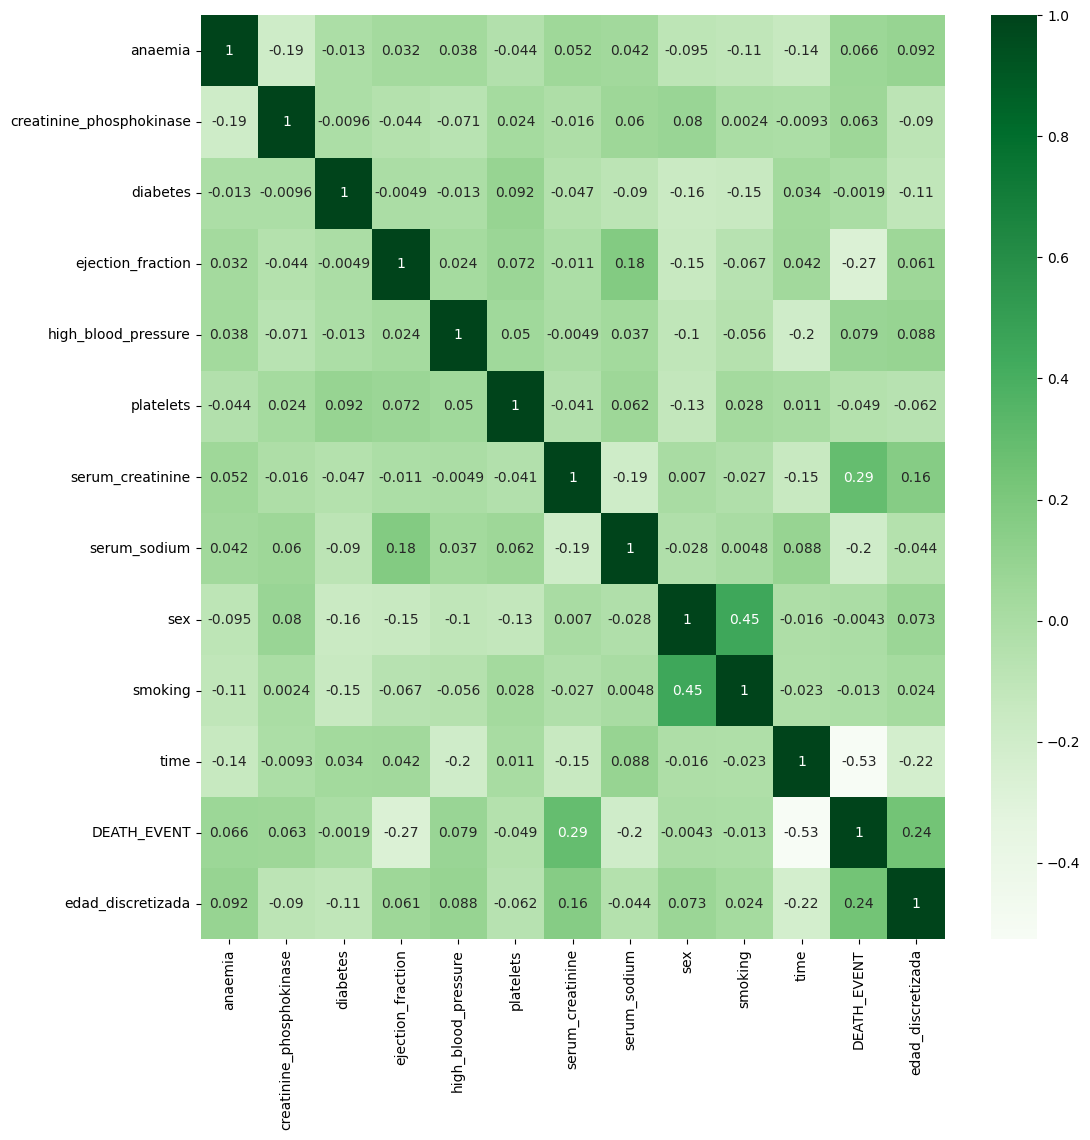

In [ ]:
plt.rcParams["figure.figsize"]=(12,12)
df_corr=df.corr()
sns.heatmap(df_corr, cmap="Greens", annot = True)